<a href="https://colab.research.google.com/github/karkos16/SiADproject/blob/main/zadDom_Karol_Kostrubiec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****
**Karol Kostrubiec 151820 i najwiekszy chuj na miescie JJ Julia Jebaczżon**
****

****
# Zbiór danych
**Pochodzenie i opis**

Zbiór danych wykorzystany w mojej pracy można znaleźc pod linkiem: https://www.kaggle.com/datasets/ruchi798/drug-overdose-deaths

Przedstawia on śmierci powiązane z przedawkowaniem narkotyków w stanie Connecticut w latach 2012 - 2018. Zbiór zawiera ponad 5000 unikalnych danych o zgonie, każdy rekord w zbiorze danych opisuje jeden odnotowany zgon. Każdy odnotowany zgon zawiera informacje na temat daty zgłoszenia/śmierci, wieku, płci, rasy, miasta, hrabstwa oraz stan zamieszkania osoby zmarłej z powodu przedawkowania narkotyków. Jednak ja w swojej pracy użyję tylko dane związane z datą śmierci, wiekiem, płcią oraz rasą.
****

In [1]:
url <- "https://raw.githubusercontent.com/karkos16/SiADproject/main/drug_deaths.csv"
destfile <- "drug_deaths.csv"
download.file(url, destfile)


# Analiza eksploracyjna

In [2]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [53]:
# Wczytanie danych z pliku drug_deaths.csv
data <- read.csv("drug_deaths.csv")
data <- data[complete.cases(data$Age),] #pozbycie się wartości nieokreślonych
data <- data[complete.cases(data$Race),]
data <- data[complete.cases(data$Sex),]

In [4]:
n <- length(data$ID) #liczba unikalnych rekordów
k <- round(5*log10(n),0) - 6
h <- floor((max(data$Age) - min(data$Age))/k)

print(paste("Liczba przedziałów:", k))
print(paste("Szerokość przedziału:", h))
print(paste("Maksymalna wartość:", max(data$Age)))
print(paste("Minimalna wartość:", min(data$Age)))

[1] "Liczba przedziałów: 13"
[1] "Szerokość przedziału: 5"
[1] "Maksymalna wartość: 87"
[1] "Minimalna wartość: 14"


Na podstawie teoretycznych wartości liczby przedziałów i szerokości przedziału, biorąc pod uwagę wartość minimalną i maksymalną postanowiłem zwiększyć liczbę przedziałów nie zmieniając ich szerokości co pozwoliło na pokrycie wszystkich wartości. Poniższy histogram jest generowany za pomocą funkcji języka R, jednak szerokość oraz liczba przedziałów zgadza się z oczekiwanymi wartościami, dlatego nie ma potrzeby aby generować wykres "ręcznie".

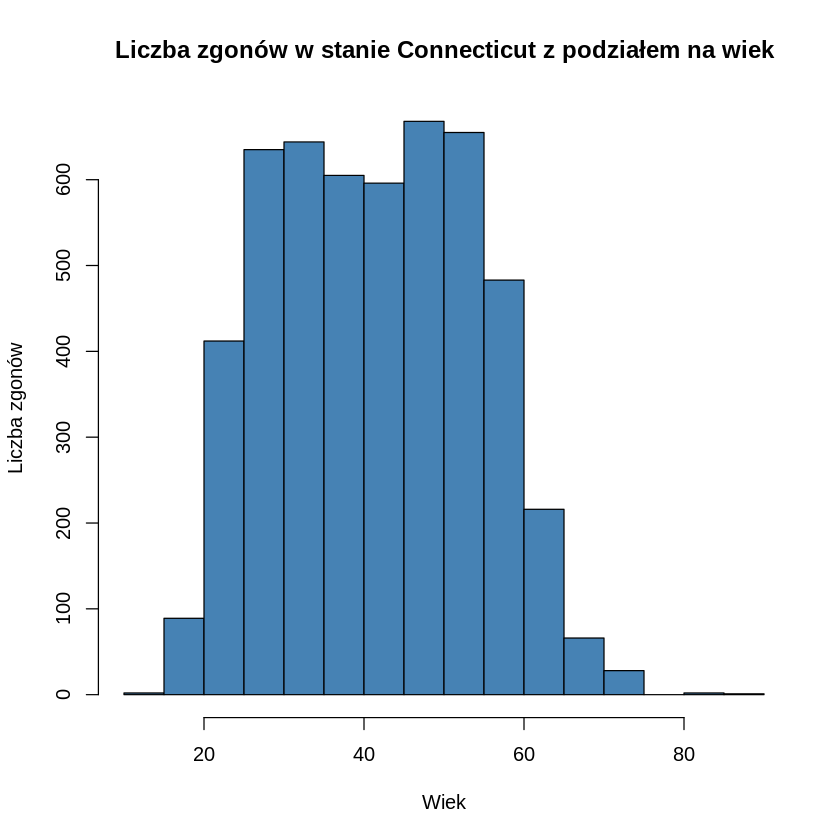

In [5]:
hist(
  data$Age,
  main = "Liczba zgonów w stanie Connecticut z podziałem na wiek",
  xlab = "Wiek",
  ylab = "Liczba zgonów",
  col = "steelblue"
)

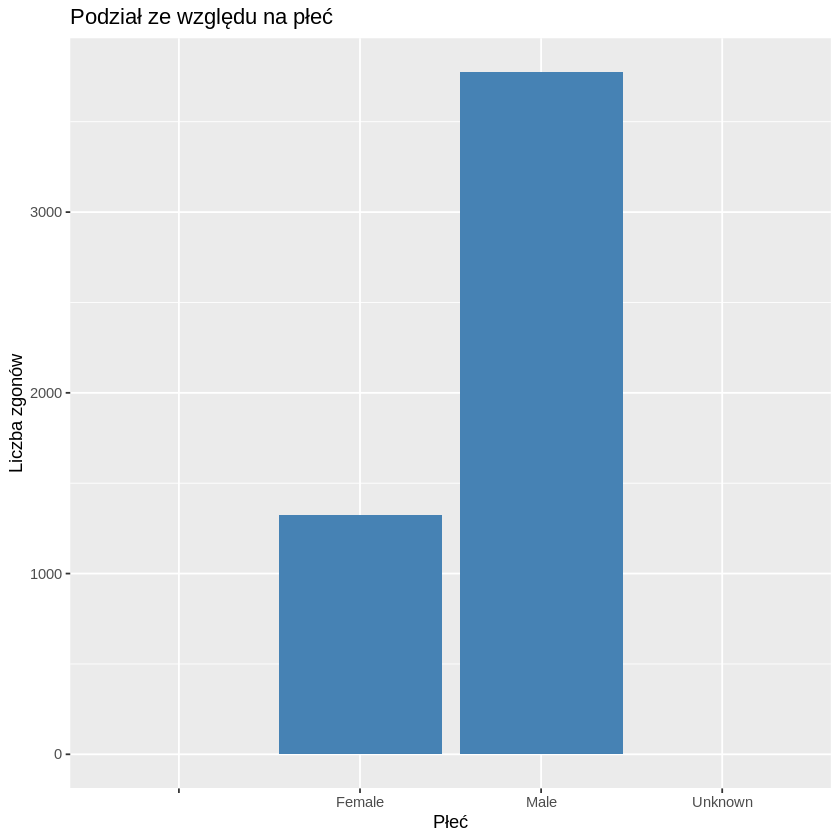

In [6]:
sex_count <- data.frame(data$Sex)

ggplot(sex_count, aes(x=data$Sex)) + geom_bar(fill = "steelblue") + labs(title = "Podział ze względu na płeć",
               x = "Płeć",
               y = "Liczba zgonów")

Jak widać na powyższym wykresie mężczyźni są głównymi osobami w bazie danych i przewyżają liczbę zgonów kobiet prawie trzykrotnie.
****

In [7]:
race_count <- table(data$Race)
race_count
count <- length(data$Race)
white_percent = race_count['White']/count * 100
latin_percent = (race_count['Hispanic, White'] + race_count['Hispanic, Black']) /count * 100
black_percent = race_count['Black']/count * 100
print(paste("Liczba rekordów: ", count))
print(paste("% białych: ", race_count['White']/count * 100))
print(paste("% latynosów", (race_count['Hispanic, White'] + race_count['Hispanic, Black']) /count * 100))
print(paste("% czarnych: ", race_count['Black']/count * 100))



                                 Asian Indian           Asian, Other 
                    10                     14                     18 
                 Black                Chinese               Hawaiian 
                   433                      2                      1 
       Hispanic, Black        Hispanic, White Native American, Other 
                    24                    561                      1 
                 Other                Unknown                  White 
                    11                     23                   4004 

[1] "Liczba rekordów:  5102"
[1] "% białych:  78.4790278322227"
[1] "% latynosów 11.4660917287338"
[1] "% czarnych:  8.48686789494316"


Wśród zbioru danych można wyróźnić 3 główne rasy są to biali, czarni oraz latynosi. Obliczając udział procentowy w liczbie zgonów, chciałem sprawdzić jak to się ma do danych populacji, które znalazłem pod linkiem: https://www.populationu.com/us/connecticut-population#race. Można zauważyć, że udziały procentowe poszczególnych ras w populacji stanu, są zbliżone do udziału procentowego poszczególnych ras w badanym zbiorze.

**Statystyki opisowe**
****
Wiek

In [ ]:
print(paste("Średnia wieku: ", mean(data$Age)))
print(paste("Mediana wieku: ", median(data$Age)))
print(paste("Wariancja: ", var(data$Age)))
print(paste("Odchylenie standardowe: ", sd(data$Age)))

[1] "Średnia wieku:  41.9649157193258"
[1] "Mediana wieku:  42"
[1] "Wariancja:  152.192652404187"
[1] "Odchylenie standardowe:  12.3366386185292"


****
# Testy statystyczne


***
## test $\chi^2$ 
***

Zastosowałem test $\chi^2$ w celu sprawdzenia czy śmiertelność poszczególnych ras jest zgodna z ich rozkładem w populacji(stanie Conecticut), dane dotyczące populacji zostały pobrane z: https://www.populationu.com/us/connecticut-population#race. W teście porównałem cztery najliczniejsze rasy: biali, czarni, latynosi, azjaci.
Rozkład ludności w stanie Conecticut podano w tabeli *typical*, natomiast zaobserwowaną liczbę zgonów z podziałem na rasy w tabeli observed

In [ ]:
black_observed = as.numeric(race_count['Black'])
latin_observed = as.numeric(race_count['Hispanic, White']) + as.numeric(race_count['Hispanic, Black'])
white_observed = as.numeric(race_count['White'])
asian_observed = as.numeric(race_count['Asian Indian'])  + as.numeric(race_count['Chinese'])

categories = c("Asian", "Black", "Latin", "White")
typical = c(156450, 376240, 551916,	2757064)
observed = c(asian_observed, black_observed, latin_observed, white_observed)

Postawiona hipoteza zerowa:

**h0: rozkład śmierci według rasy jest zgodny z rozkładem rasy w stanie**

Postawiona hipoteza alternatywna:

**h1: rozkłady nie są zgodne**

Przyjęty poziom istotności $\alpha = 0.05$.

In [ ]:
alpha = 0.05

Liczba stopni swobody *df*:

In [ ]:
df = length(typical) - 1
df

[1] 3

Tabela wartoci oczekiwanych:

In [ ]:
sum_observed <- sum(observed)
sum_typical <- sum(typical)

prob_typical <- typical/sum_typical

expected <- prob_typical * sum_observed
expected
observed

[1]  205.1699  493.4045  723.7875 3615.6381

[1]   16  433  585 4004

Statystyka testowa:

In [ ]:
chisq.test(observed, p=expected/sum(expected))


	Chi-squared test for given probabilities

data:  observed
X-squared = 250.14, df = 3, p-value < 2.2e-16


Wartość krytyczna

In [ ]:
crit = qchisq(1-alpha, df)
crit

[1] 7.814728

Wnioski:

Hipoteza zerowa h0 zostaje odrzucona na rzecz h1. Rozkłady śmierci z powodu przedawkowania narkotyków według rasy a rozkładem rasy w stanie Coecticut nie są zgodne.

***
## Test **t-Studenta**
***

Przeprowadziłem test ***t-Studenta*** w celu odpowiedzenia na pytanie:

*Czy istnieje istotna różnica w średnim wieku zmarłych mężczyzn i kobiet w związku z przedawkowaniem narkotyków?*


In [9]:
data_male <- data[data$Sex == "Male", "Age"]
data_female <- data[data$Sex == "Female", "Age"]

Na początku zostały sprawdzone założenia testu ***t-Studenta***, w tym celu uzyto testu normalności ***Shapiro-Wilka***

In [ ]:
shapiro.test(data_male)
shapiro.test(data_female)


	Shapiro-Wilk normality test

data:  data_male
W = 0.97903, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  data_female
W = 0.97637, p-value = 6.416e-14


P wartości są mniejsze od 0.05 co oznacza, że dane znacząco nie odbiegają od rozkładu normalnego. Założenia testu t-Studenta zostały spełnione

Porównanie wariancji

In [ ]:
var.test(data_male, data_female) # Test F


	F test to compare two variances

data:  data_male and data_female
F = 0.94451, num df = 3772, denom df = 1324, p-value = 0.2018
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.8636298 1.0310034
sample estimates:
ratio of variances 
         0.9445144 


In [ ]:
t_test_result <- t.test(data_male, data_female)
t_test_result


	Welch Two Sample t-test

data:  data_male and data_female
t = -1.9652, df = 2260.7, p-value = 0.04951
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.567454363 -0.001667651
sample estimates:
mean of x mean of y 
 41.75431  42.53887 


In [ ]:
t_test_result$p.value
t_test_result$estimate

[1] 0.0495144

mean of x mean of y 
 41.75431  42.53887

****
## Test dwóch populacji
****

Bazując na zbiorze danych chiałem odpowiedzieć na pytanie:

Czy istnieje istotna różnica w średniej wieku u kobiet i mężczyzn zmarłych z powodu przedawkowania narkotyków?

Do ustalenia odpowiedzi na to pytanie skorzystam z testu dla niesparowanej dużej próby. Jednak przed tym trzeba zweryfikować czy zmienna reprezentująca kobiety oraz zmienna reprezentująca mężczyzn może być przybliżona rozkładem normalnym. W celu sprawdzenia tego skorzystam z testu Shapiro-Wilka z poziomem istotności 0.05.

Hipotezy głównego testu:

H_0 = Nie istnieje róźnica w średniej wieku u kobiet i mężczyzn zmarłych z powodu przedawkowania narkotyków.

H_1 = Istnieje różnica
Poziom istoności 0.05.

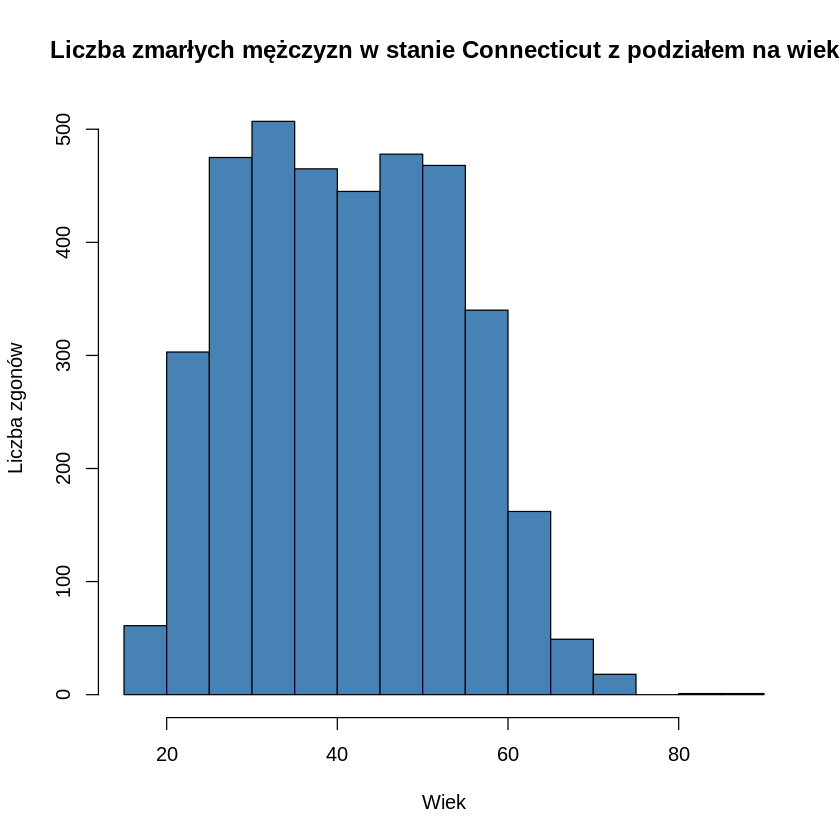

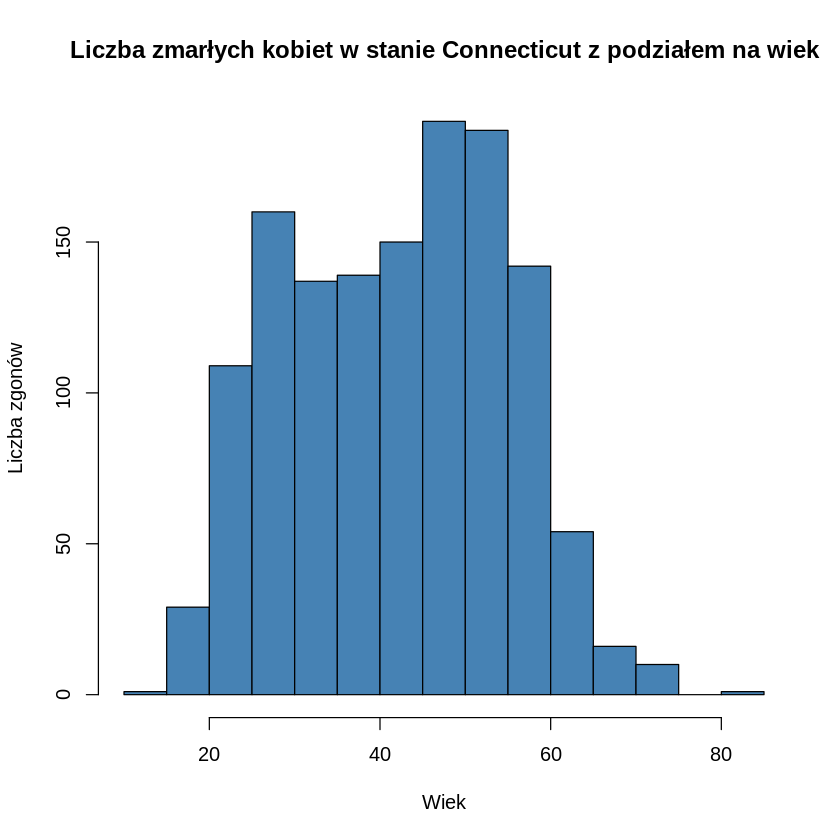

In [18]:
data_male <- data[data$Sex == "Male", "Age"]
data_female <- data[data$Sex == "Female", "Age"]
hist(data_male, 
  main = "Liczba zmarłych mężczyzn w stanie Connecticut z podziałem na wiek",
  xlab = "Wiek",
  ylab = "Liczba zgonów",
  col = "steelblue")
hist(data_female,
  main = "Liczba zmarłych kobiet w stanie Connecticut z podziałem na wiek",
  xlab = "Wiek",
  ylab = "Liczba zgonów",
  col = "steelblue"
  )

**Test Shapiro-Wilka**

W teście Shapiro-Wilka hipoteza zerowa brzmi: Zmienna może mieć rozkład normalny, a alternatywna że zmienna nie może mieć rozkładu normalnego.

In [29]:
shapiro.test(data_male)
shapiro.test(data_female)


	Shapiro-Wilk normality test

data:  data_male
W = 0.97903, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  data_female
W = 0.97637, p-value = 6.416e-14


Niestety w obu przypadkach muszę udrzucić hipotezę zerową i przyjąć hipotezę alternatywną. Przez to nie mogę kontynuować testu niesparowanego. I muszę zmienić test na Manna-Whitneya, który w R znajduje się pod funckją wilcoxon().

In [34]:
wilcox.test(data_male, data_female, paired = FALSE, correct = FALSE)


	Wilcoxon rank sum test

data:  data_male and data_female
W = 2401110, p-value = 0.03253
alternative hypothesis: true location shift is not equal to 0


Na podstawie powyższego testu odrzucam hipotezę zerową na rzecz hipotezy alternatywnej, czyli "Istnieje istotna statystycznie róźnica średniej wieku u kobiet i mężczyzn zmarłych z powodu przedawkowania narkotyków."

****
## Test Z
****
W tym teście chciałbym sprawdzić czy istnieje statystcznie istotna róźnica między średnią wieku ofiar z całego okresu a poszczególnymi latami z zbioru danych.

Test jest dwustronny z poziomem istotności α = 0.05.
Hipotezy:

H_0: 𝐗_year = μ

H_1: 𝐗_year != μ 

In [54]:
data$Date <- as.Date(data$Date, format = "%m/%d/%Y %I:%M:%S %p")
data$Date <- format(data$Date, "%Y")

In [92]:
z <- function(year_data) {
  z <- ((mean(year_data) - mean(data$Age))/sd(data$Age))*sqrt(length(year_data))
  z <- abs(z)
  return(z)
}

reject <- function(value) {
  decision = FALSE
  if (value > qnorm(1 - 0.05/2)) {
    decision = TRUE
  }
  return(decision)
}


mean_all_period <- mean(data$Age)
data_2012 <- data[data$Date == '2012', "Age"]
data_2013 <- data[data$Date == '2013', "Age"]
data_2014 <- data[data$Date == '2014', "Age"]
data_2015 <- data[data$Date == '2015', "Age"]
data_2016 <- data[data$Date == '2016', "Age"]
data_2017 <- data[data$Date == '2017', "Age"]
data_2018 <- data[data$Date == '2018', "Age"]

data_2012 <- data_2012[complete.cases(data_2012)]
data_2013 <- data_2013[complete.cases(data_2013)]
data_2014 <- data_2014[complete.cases(data_2014)]
data_2015 <- data_2015[complete.cases(data_2015)]
data_2016 <- data_2016[complete.cases(data_2016)]
data_2017 <- data_2017[complete.cases(data_2017)]
data_2018 <- data_2018[complete.cases(data_2018)]

years <- c(2012, 2013, 2014, 2015, 2016, 2017, 2018)
data_list <- list(data_2012, data_2013, data_2014, data_2015, data_2016, data_2017, data_2018)
frame <- data.frame(Year = years, MeanAge = sapply(data_list, mean))
frame <- cbind(frame, VarianceAge = sapply(data_list, var))
frame <- cbind(frame, SdAge = sapply(data_list, sd))
frame <- cbind(frame, Zvalue = sapply(data_list, z))
frame <- cbind(frame, RejectH0 = sapply(frame$Zvalue, reject))
frame

Year,MeanAge,VarianceAge,SdAge,Zvalue,RejectH0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
2012,40.77183,157.3687,12.54467,1.8221689,FALSE
2013,41.38776,149.7757,12.23829,1.0356139,FALSE
2014,41.57810,143.4494,11.97704,0.7400112,FALSE
2015,42.30303,163.9301,12.80352,0.7384743,FALSE
2016,42.08288,147.0455,12.12623,0.2895573,FALSE
2017,41.74085,150.7650,12.27864,0.5851693,FALSE
2018,42.76523,153.3873,12.38496,2.0698335,TRUE


[1] 1.959964

Na podstawie przeprowadzonego testu, jedynie w roku 2018 wartość średnia wieku różniła się statystycznie od średniej wieku w całej próbie.
****